In [270]:
#AST,STL,REB,累積三隊,PTS,FG%,FT%,3P%,W,+/-
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [271]:
data = pd.read_csv(r'/Users/xuzhejia/Desktop/NBA/資料/模型資料.csv')

In [272]:

x = data.loc[:,['GP','W','L','MIN','PTS','FGA','FG%','3PA','3P%','FTA',
       'FT%','OREB','DREB','REB', 'AST','TOV', 'STL', 'BLK','PF','DD2','TD3',
       '+/-', '累積前三隊','勝率','DFG_percent','DIFF_percent', 'C', 'C-F', 'F', 'F-C', 'F-G',
       'G', 'G-F']]
y = data.loc[:,'當年有無入選']

In [273]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state=2,stratify=y.values)

In [274]:
logistic = LogisticRegression(penalty = 'l2',class_weight=None,random_state=10)

In [275]:
logistic.fit(x_train.values,y_train.values)

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [276]:
proba = logistic.predict_proba(x_train.values)[:,1]

In [277]:
pro = []
for x in proba:
    pro.append(round(x,2))
np.array(pro)

array([0., 0., 0., ..., 0., 0., 0.])

In [278]:
df = pd.DataFrame([pro,y_train]).T

In [279]:
df = pd.DataFrame(df.groupby(1)[0].value_counts())

In [280]:
opportunity = []
classify = []
for x in  df.index:
    opportunity.append(x[1])
    classify.append(x[0])
df['opportunity'] = opportunity
df['classify'] = classify

<BarContainer object of 42 artists>

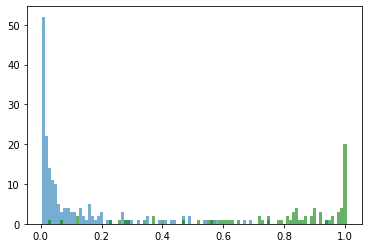

In [281]:
plt.bar(df['opportunity'].values[np.where(df['classify'] == 0)[0][1:]],df[0].values[np.where(df['classify'] == 0)[0][1:]],width = 0.01,alpha = 0.6)
plt.bar(df['opportunity'].values[np.where(df['classify'] == 1)[0]],df[0].values[np.where(df['classify'] == 1)[0]],width = 0.01,alpha = 0.6,color = 'green')

In [282]:
y_label = y_train.values
y_pre = pro
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)

In [283]:
#0.38
matrix = []
matrix_1 = []
for x,y,z in zip(fpr,tpr,thersholds):
    l = []
    for m in proba:
        if m < z:
            l.append(0)
        else:
            l.append(1)
    matrix.append(confusion_matrix(y_train.values,l))
    p = pd.DataFrame(confusion_matrix(y_train.values,l),index = ["actual 0","actual 1"],columns=["predict 0","predict 1"])
    print("thersholds:",z)
    print(p)
    matrix_1.append(p.values)
roc_auc = auc(fpr, tpr)
print("auc",roc_auc)

thersholds: 2.0
          predict 0  predict 1
actual 0       2730          0
actual 1         84          0
thersholds: 1.0
          predict 0  predict 1
actual 0       2730          0
actual 1         84          0
thersholds: 0.99
          predict 0  predict 1
actual 0       2730          0
actual 1         61         23
thersholds: 0.98
          predict 0  predict 1
actual 0       2730          0
actual 1         58         26
thersholds: 0.96
          predict 0  predict 1
actual 0       2730          0
actual 1         57         27
thersholds: 0.95
          predict 0  predict 1
actual 0       2730          0
actual 1         54         30
thersholds: 0.94
          predict 0  predict 1
actual 0       2729          1
actual 1         54         30
thersholds: 0.92
          predict 0  predict 1
actual 0       2729          1
actual 1         52         32
thersholds: 0.9
          predict 0  predict 1
actual 0       2729          1
actual 1         49         35
thersholds: 0

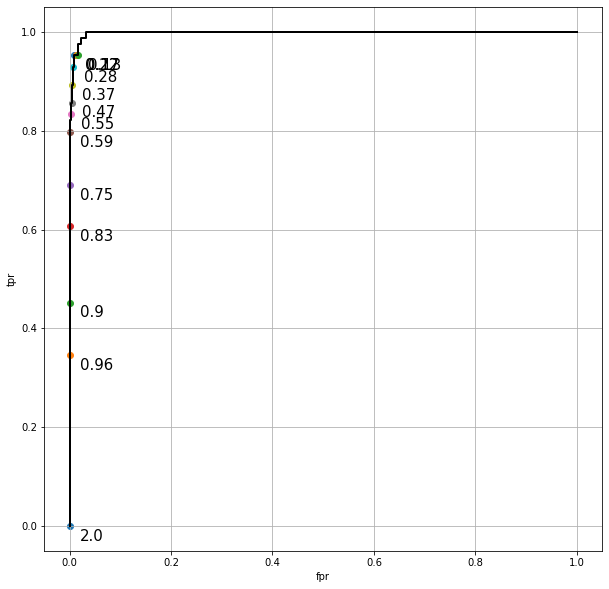

In [284]:
plt.figure(figsize=(10,10))
plt.grid(which = 'both')
plt.step(fpr,tpr, 'k', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.xlabel("fpr")
plt.ylabel("tpr")
for x in range(0,52,4):
    plt.scatter(fpr[x],tpr[x])
    plt.text(fpr[x]+0.02,tpr[x]-0.03,thersholds[x],size=15)

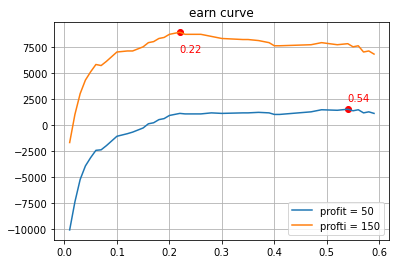

In [285]:
profit_matrix = np.array([[0,-100],[-100,50]])
earn = []
for x in matrix_1:
    earn.append(np.sum(x * profit_matrix))
plt.plot(thersholds[::-1][1:40],earn[::-1][1:40])
plt.scatter(thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],earn[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],color = 'red')
plt.text(thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],earn[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]]+800,color = 'red',s =thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]])
profit_matrix = np.array([[0,-100],[-150,150]])
earn = []
for x in matrix_1:
    earn.append(np.sum(x * profit_matrix))
plt.plot(thersholds[::-1][1:40],earn[::-1][1:40])
plt.scatter(thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],earn[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],color = 'red')
plt.text(thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],earn[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]]-1900,color = 'red',s =thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]])

plt.title('earn curve')
plt.legend(['profit = 50','profti = 150'])
plt.grid()

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[[   0 -100]\n [-150  150]]')

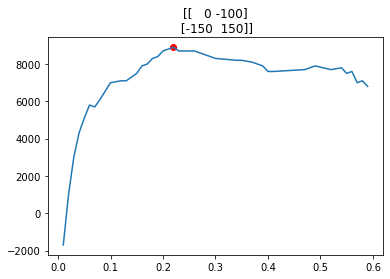

In [286]:
profit_matrix = np.array([[0,-100],[-150,150]])
earn = []
for x in matrix_1:
    earn.append(np.sum(x * profit_matrix))
plt.plot(thersholds[::-1][1:40],earn[::-1][1:40])
plt.scatter(thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],earn[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],color = 'red')
plt.title(profit_matrix)

In [287]:
thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]]

0.22

In [288]:
prob_1 = logistic.predict_proba(x_test)[:,1]

In [289]:
df = pd.DataFrame([y_test.values,prob_1]).T
prob = []
for x in df[1].values:
    prob.append(round(x,2))
df['prob'] = prob

In [290]:
df = pd.DataFrame(df.groupby(0)['prob'].value_counts())

In [291]:
opportunity = []
classify = []
for x in  df.index:
    opportunity.append(x[1])
    classify.append(x[0])
df['opportunity'] = opportunity
df['classify'] = classify
df

prob  opportunity  classify
0   prob                             
0.0 0.00  1114         0.00       0.0
    0.01    19         0.01       0.0
    0.03     6         0.03       0.0
    0.02     2         0.02       0.0
    0.10     2         0.10       0.0
    0.14     2         0.14       0.0
    0.04     1         0.04       0.0
    0.05     1         0.05       0.0
    0.06     1         0.06       0.0
    0.07     1         0.07       0.0
    0.09     1         0.09       0.0
    0.13     1         0.13       0.0
    0.15     1         0.15       0.0
    0.17     1         0.17       0.0
    0.18     1         0.18       0.0
    0.19     1         0.19       0.0
    0.20     1         0.20       0.0
    0.21     1         0.21       0.0
    0.23     1         0.23       0.0
    0.27     1         0.27       0.0
    0.28     1         0.28       0.0
    0.35     1         0.35       0.0
    0.38     1         0.38       0.0
    0.40     1         0.40       0.0
    0.45     1         0.45       0.0
    0.46     1         0.46       0.0
    0.49     1         0.49       0.0
    0.57     1         0.57       0.0
    0.59     1         0.59       0.0
    0.65     1         0.65       0.0
    0.66     1         0.66       0.0
    0.71     1         0.71       0.0
1.0 1.00     8         1.00       1.0
    0.99     4         0.99       1.0
    0.86     2         0.86       1.0
    0.90     2         0.90       1.0
    0.09     1         0.09       1.0
    0.12     1         0.12       1.0
    0.14     1         0.14       1.0
    0.23     1         0.23       1.0
    0.29     1         0.29       1.0
    0.35     1         0.35       1.0
    0.68     1         0.68       1.0
    0.69     1         0.69       1.0
    0.73     1         0.73       1.0
    0.74     1         0.74       1.0
    0.78     1         0.78       1.0
    0.80     1         0.80       1.0
    0.83     1         0.83       1.0
    0.85     1         0.85       1.0
    0.88     1         0.88       1.0
    0.89     1         0.89       1.0
    0.91     1         0.91       1.0
    0.95     1         0.95       1.0
    0.96     1         0.96       1.0
    0.98     1         0.98       1.0

<BarContainer object of 24 artists>

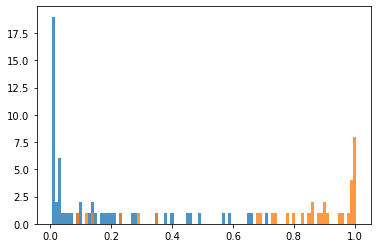

In [292]:
plt.bar(df['opportunity'].values[np.where(df['classify'].values == 0)[0][1:]],df['prob'].values[np.where(df['classify'].values == 0)[0][1:]],width = 0.01,alpha = 0.8)
plt.bar(df['opportunity'].values[np.where(df['classify'].values == 1)[0]],df['prob'].values[np.where(df['classify'].values== 1)[0]],width = 0.01,alpha = 0.8)

In [293]:
y_label = y_test.values
y_pre = prob_1
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)

In [294]:
matrix = []
for x,y,z in zip(fpr,tpr,thersholds):
    l = []
    for m in proba:
        if m < z:
            l.append(0)
        else:
            l.append(1)
    matrix.append(confusion_matrix(y_train.values,l))
    p = pd.DataFrame(confusion_matrix(y_train.values,l),index = ["actual 0","actual 1"],columns=["predict 0","predict 1"])
    print("thersholds:",z)
    print(p)
roc_auc = auc(fpr, tpr)
print("auc",roc_auc)

thersholds: 1.999953296883766
          predict 0  predict 1
actual 0       2730          0
actual 1         84          0
thersholds: 0.9999532968837661
          predict 0  predict 1
actual 0       2730          0
actual 1         84          0
thersholds: 0.7297227867598811
          predict 0  predict 1
actual 0       2728          2
actual 1         25         59
thersholds: 0.713059322851638
          predict 0  predict 1
actual 0       2728          2
actual 1         23         61
thersholds: 0.6761849193435503
          predict 0  predict 1
actual 0       2727          3
actual 1         23         61
thersholds: 0.3764558106903972
          predict 0  predict 1
actual 0       2715         15
actual 1         11         73
thersholds: 0.3488632266359832
          predict 0  predict 1
actual 0       2713         17
actual 1          9         75
thersholds: 0.34524198028310343
          predict 0  predict 1
actual 0       2713         17
actual 1          9         75
thershold

In [295]:
df = pd.read_csv(r'/Users/xuzhejia/Desktop/NBA/資料/今年資料.csv')
df

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,position,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F
0,0.938670,1.489091,0.065084,1.518321,3.519689,2.648595,0.497309,0.416571,0.581259,6.289735,...,C-F,C-F,0,0,1,0,0,0,0,0
1,0.458649,0.169472,0.645377,1.878668,3.471913,3.107778,0.703385,2.314415,0.492559,2.682395,...,F,F,0,0,0,1,0,0,0,0
2,0.898668,1.489091,-0.007452,1.422935,3.408213,2.439875,0.942435,0.372435,0.004708,6.040953,...,F,F,0,0,0,1,0,0,0,0
3,0.418648,0.895262,-0.225062,1.878668,3.408213,2.794699,0.653927,1.211017,0.669959,3.553132,...,F,F,0,0,0,1,0,0,0,0
4,0.818665,1.423110,-0.079989,1.687896,3.169335,3.066034,0.151100,2.667503,0.448209,3.615328,...,F-G,F-G,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,-1.621438,-1.480053,-1.313111,-1.523438,-1.353425,-1.275334,-3.615985,-0.995779,-2.161053,-1.049336,...,F,F,0,0,0,1,0,0,0,0
580,-1.661440,-1.282110,-1.603257,-1.788400,-1.353425,-1.379694,-3.615985,-1.216459,-2.161053,-0.613968,...,C,C,0,1,0,0,0,0,0,0
581,-1.741443,-1.414072,-1.603257,-1.851991,-1.353425,-1.442310,-3.615985,-1.216459,-2.161053,-1.049336,...,F,F,0,0,0,1,0,0,0,0
582,-1.741443,-1.414072,-1.603257,-1.968574,-1.353425,-1.442310,-3.615985,-1.216459,-2.161053,-1.049336,...,F,F,0,0,0,1,0,0,0,0


In [296]:
x = df.loc[:,['GP','W','L','MIN','PTS','FGA','FG%','3PA','3P%','FTA',
       'FT%','OREB','DREB','REB', 'AST','TOV', 'STL', 'BLK','PF','DD2','TD3',
       '+/-', '累積前三隊','勝率','DFG_percent','DIFF_percent', 'C', 'C-F', 'F', 'F-C', 'F-G',
       'G', 'G-F']]
x = x.dropna()

In [297]:
proba = logistic.predict_proba(x.values)[:,1]

In [298]:
df = df.dropna()
df['prob'] = proba

In [299]:
y = df.groupby("Final_Position")
for z,m in y:
    print(z)
    print(y.get_group(z).sort_values('prob',ascending=False).head(8).loc[:,['Player','prob',"PTS",'AST','REB']])

C
                Player      prob       PTS       AST       REB
9         Nikola Jokic  0.998416  2.962307  3.252996  4.324829
81         Rudy Gobert  0.829010  1.130908 -0.451069  4.704932
64       Deandre Ayton  0.115399  1.385711 -0.287655  2.804417
75       Jarrett Allen  0.059118  1.210534 -0.178711  3.057819
55   Jonas Valanciunas  0.014720  1.481262  0.366004  3.311221
56      Nikola Vucevic  0.011391  1.449412  0.692833  3.142286
92         Evan Mobley  0.010001  1.035357  0.311532  2.001977
108       Jakob Poeltl  0.002138  0.796479  0.474947  2.424314
C-F
                  Player      prob       PTS       AST       REB
0            Joel Embiid  0.998494  3.519689  1.237549  3.437922
14    Karl-Anthony Towns  0.535297  2.564177  0.910719  2.635482
43           Bam Adebayo  0.108326  1.688290  0.801776  2.762183
186  Robert Williams III  0.006805  0.239096  0.039175  2.551015
206         JaVale McGee  0.000500  0.111695 -0.723427  1.326239
178           Al Horford  0.000489  0

In [300]:
df[df['Player'] == 'Stephen Curry']

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F,prob
13,0.778663,1.489091,-0.225062,1.59251,2.707504,2.544235,-0.013762,3.947444,0.647784,1.873853,...,G,0,0,0,0,0,0,1,0,0.710548


In [301]:
df[df['Player'] == 'Dejounte Murray']

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F,prob
30,0.93867,0.499377,1.153133,1.624305,2.006794,2.37726,0.192315,0.681386,0.256025,1.189702,...,G,0,0,0,0,0,0,1,0,0.228624


In [302]:
df.sort_values('prob',ascending=False).head(20).loc[:,['Player','prob']]

,Player,prob
2,Giannis Antetokounmpo,0.999724
0,Joel Embiid,0.998494
9,Nikola Jokic,0.998416
3,Kevin Durant,0.970133
11,Devin Booker,0.936964
10,Jayson Tatum,0.905341
4,Luka Doncic,0.904853
5,Trae Young,0.902855
96,Chris Paul,0.863713
81,Rudy Gobert,0.829010
